# Running mask rcnn on pascal voc 2012 dataset. 

I have not used the original segmentation masks provided, instead I have created rectangular masks from bounding boxes and used them.


In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anupamshandilya92","key":"5a4efdbf2d37f0db0b5e6fc5d6e3965d"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d huanghanchina/pascal-voc-2012

 99% 3.61G/3.63G [01:07<00:00, 97.4MB/s]
100% 3.63G/3.63G [01:07<00:00, 57.6MB/s]


In [5]:
! mkdir data 
!cp pascal-voc-2012.zip /content/data

In [ ]:
! unzip /content/data/pascal-voc-2012.zip

In [ ]:
! ls /content/VOC2012/Annotations/

In [ ]:
!cat /content/VOC2012/Annotations/2011_002796.xml

In [ ]:
!ls /content/VOC2012/SegmentationClass/

In [7]:
#Saving filenames in dataframes
import pandas as pd
train = pd.read_csv('/content/VOC2012/ImageSets/Segmentation/train.txt', header = None)
val = pd.read_csv('/content/VOC2012/ImageSets/Segmentation/val.txt', header = None)
train['val'] = val
train.columns = ['train','val']

In [8]:
train.head()

,train,val
0,2007_000032,2007_000033
1,2007_000039,2007_000042
2,2007_000063,2007_000061
3,2007_000068,2007_000123
4,2007_000121,2007_000129


In [ ]:
! cat /content/VOC2012/Annotations/2011_002796.xml

In [9]:
#function taken from https://machinelearningmastery.com/how-to-train-an-object-detection-model-with-keras/
from xml.etree import ElementTree
# example of extracting bounding boxes from an annotation file


# function to extract bounding boxes from an annotation file
def extract_boxes(filename):
	# load and parse the file
	tree = ElementTree.parse(filename)
	# get the root of the document
	root = tree.getroot()
	# extract each bounding box
	boxes = list()
	for box in root.findall('.//bndbox'):
		xmin = int(box.find('xmin').text)
		ymin = int(box.find('ymin').text)
		xmax = int(box.find('xmax').text)
		ymax = int(box.find('ymax').text)
		coors = [xmin, ymin, xmax, ymax]
		boxes.append(coors)
	# extract image dimensions
	width = int(root.find('.//size/width').text)
	height = int(root.find('.//size/height').text)
	labels = []
	for obj in root.findall("object"):
		# Get object's label name.
		label = obj.find("name").text.lower()
		#labels.append(label)

		bndbox = obj.find("bndbox")
		xmax = float(bndbox.find("xmax").text)
		xmin = float(bndbox.find("xmin").text)
		ymax = float(bndbox.find("ymax").text)
		ymin = float(bndbox.find("ymin").text)
		bbox = [xmax,xmin,ymax,ymin]
		#annotations['xmax'] = xmax
		#annotations['xmin'] = xmin
		#annotations['ymax'] = ymax
		#annotations['ymin'] = ymin
		#bboxes.append(bbox)
		labels.append(label)
		file_details = {
		#"filename" : annon_filepath[:-4],
		"label": label,
		"xmax" : xmax,
		"xmin" : xmin,
		"ymax" : ymax,
		"ymin" : ymin

		}
	return boxes, width, height, labels

# extract details form annotation file
boxes, w, h, labels = extract_boxes('/content/VOC2012/Annotations/2008_000630.xml')
# summarize extracted details
print(boxes, w, h, labels)

[[92, 155, 174, 411], [114, 156, 144, 190], [164, 278, 178, 295], [93, 285, 109, 308], [150, 389, 167, 412], [96, 387, 129, 407]] 273 500 ['person']


In [10]:
tree = ElementTree.parse('/content/VOC2012/Annotations/2008_000630.xml')
	# get the root of the document
root = tree.getroot()
for i in root.findall("object"):
  print(i)

<Element 'object' at 0x7f70a3b39138>


In [11]:

classes = [
    "aeroplane",
    "bicycle",
    "bird",
    "boat",
    "bottle",
    "bus",
    "car",
    "cat",
    "chair",
    "cow",
    "diningtable",
    "dog",
    "horse",
    "motorbike",
    "person",
    "pottedplant",
    "sheep",
    "sofa",
    "train",
    "tvmonitor"]
classes_dict = dict()
counter = 1
for i in classes:
  classes_dict[i] = counter
  counter += 1


In [12]:
#Downloading Mask-RCNN
#Downloading matterport's implementation of Mask-RCNN
!git clone https://github.com/matterport/Mask_RCNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 111.85 MiB | 40.16 MiB/s, done.
Resolving deltas: 100% (563/563), done.


In [13]:
#Installing dependencies
%cd /content/Mask_RCNN
#%cd ~/Mask_RCNN

!pip install -q PyDrive
!pip install -q -r requirements.txt
!pip install -q -q -q tensorflow-gpu==1.15
!sudo pip install -q -q -q --no-deps keras==2.2.5                  
!python setup.py install
!python3 setup.py install

/content/Mask_RCNN
     |████████████████████████████████| 163kB 4.6MB/s 
     |████████████████████████████████| 204kB 13.9MB/s 
     |████████████████████████████████| 411.5MB 39kB/s 
     |████████████████████████████████| 51kB 8.1MB/s 
     |████████████████████████████████| 512kB 48.5MB/s 
     |████████████████████████████████| 3.8MB 46.2MB/s 
ERROR: tensorflow 2.3.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorboard<3,>=2.3.0, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorflow-estimator<2.4.0,>=2.3.0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
     |████████████████████████████████| 337kB 4.5MB/s 
running install
running bdist_egg
running egg_info
creating mask_rcnn.egg-info
writing mask_rcnn.egg-info/PKG-

In [14]:
#importing necessary libraries
from os import listdir
from xml.etree import ElementTree
import matplotlib.pyplot as plt
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from mrcnn.utils import Dataset
from mrcnn.utils import compute_ap
# evaluate the mask rcnn model on the kangaroo dataset
from os import listdir
from xml.etree import ElementTree
import numpy as np
from numpy import zeros
from numpy import asarray
from numpy import expand_dims
from numpy import mean
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from mrcnn.utils import Dataset
from mrcnn.utils import compute_ap
from mrcnn.model import load_image_gt
from mrcnn.model import mold_image
from numpy import expand_dims
from matplotlib.patches import Rectangle
from mrcnn.visualize import display_instances
from mrcnn.utils import extract_bboxes


Using TensorFlow backend.


In [15]:
train_list = train.train.dropna().values
val_list = train.val.dropna().values


In [16]:
len(train_list)

1464

In [17]:
classes_dict

{'aeroplane': 1,
 'bicycle': 2,
 'bird': 3,
 'boat': 4,
 'bottle': 5,
 'bus': 6,
 'car': 7,
 'cat': 8,
 'chair': 9,
 'cow': 10,
 'diningtable': 11,
 'dog': 12,
 'horse': 13,
 'motorbike': 14,
 'person': 15,
 'pottedplant': 16,
 'sheep': 17,
 'sofa': 18,
 'train': 19,
 'tvmonitor': 20}

In [18]:
  # split into train and test set
from os import listdir
from xml.etree import ElementTree
from numpy import zeros
from numpy import asarray
from mrcnn.utils import Dataset

dataset_dir = '/content/VOC2012/'
mask_dir = '/content/VOC2012/SegmentationClass/'
annotations_dir = '/content/VOC2012/Annotations/'
# class that defines and loads the kangaroo dataset
class VOC(Dataset):
	# load the dataset definitions
	def load_dataset(self, dataset_dir, data_set=True):
		# define one class
		for i in range(len(classes)):
			self.add_class("dataset", i, classes[i])
		# define data locations
		images_dir = '/content/VOC2012/JPEGImages/'
		annotations_dir ='/content/VOC2012/Annotations/' 
		# find all images
		if data_set == 'train':
			file_list = train_list
		elif data_set == 'val':
			file_list = val_list
		for filename in file_list:
			# extract image id
		#	print(filename)
			image_id = filename
			img_path = '/content/VOC2012/JPEGImages/' + filename + '.jpg'
			ann_path = '/content/VOC2012/Annotations/' + filename + '.xml'
			# add to dataset
			boxes, w, h, labels = self.extract_boxes('/content/VOC2012/Annotations/' + filename + '.xml')
			self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path, boxes = boxes)

	# extract bounding boxes from an annotation file

# function to extract bounding boxes from an annotation file
	def extract_boxes(self,filename):
		# load and parse the file
		tree = ElementTree.parse(filename)
		# get the root of the document
		root = tree.getroot()
		# extract each bounding box
		boxes = list()
		for box in root.findall('.//bndbox'):
			xmin = int(box.find('xmin').text)
			ymin = int(box.find('ymin').text)
			xmax = int(box.find('xmax').text)
			ymax = int(box.find('ymax').text)
			coors = [xmin, ymin, xmax, ymax]
			boxes.append(coors)
		# extract image dimensions
		width = int(root.find('.//size/width').text)
		height = int(root.find('.//size/height').text)
		labels = []
		for obj in root.findall("object"):
		 # Get object's label name.
			label = obj.find("name").text.lower()
			labels.append(label)
		return boxes, width, height, labels



	# load the masks for an image
	def load_mask(self, image_id):
		# get details of image
		info = self.image_info[image_id]
		# define box file location
		path = info['annotation']
		# load XML
		boxes, w, h, labels = self.extract_boxes(path)
		# create one array for all masks, each on a different channel
		masks = zeros([h, w, len(boxes)], dtype='uint8')
		# create masks
		class_ids = list()
		for i in range(len(boxes)):
			box = boxes[i]
			row_s, row_e = box[1], box[3]
			col_s, col_e = box[0], box[2]
			masks[row_s:row_e, col_s:col_e, i] = 1
			class_id =1

			class_ids.append(class_id)
		return masks, asarray(class_ids, dtype='int32')

	# load an image reference
	def image_reference(self, image_id):
		info = self.image_info[image_id]
		return info['path']

# train set
train_set = VOC()
train_set.load_dataset('voc', data_set = 'Train')
train_set.prepare()
print('Train: %d' % len(train_set.image_ids))

# test/val set
test_set = VOC()
test_set.load_dataset('voc', data_set='val')
test_set.prepare()
print('Test: %d' % len(test_set.image_ids))

Train: 1449
Test: 1449


In [19]:
# load an image
image_id = 0
image = train_set.load_image(image_id)
print(image.shape)
# load image mask
mask, class_ids = train_set.load_mask(image_id)
print(mask.shape)

(366, 500, 3)
(366, 500, 3)


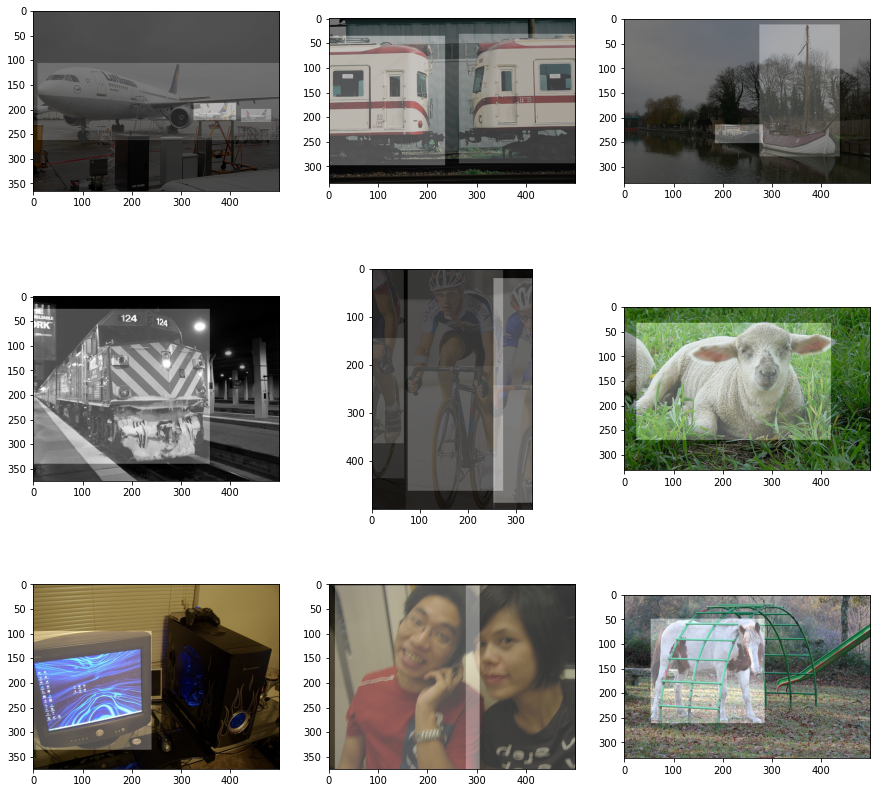

In [20]:
# plot few images
for i in range(9):
	# define subplot
	plt.rcParams['figure.figsize'] = [15, 15]
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	image = train_set.load_image(i)
	plt.imshow(image)
	# plot all masks
	mask, _ = train_set.load_mask(i)
	for j in range(mask.shape[2]):
		plt.imshow(mask[:, :, j], cmap='gray', alpha=0.3)
# show the figure
plt.show()

In [21]:
# define a configuration for the model
class vocConfig(Config):
	# Give the configuration a recognizable name
	NAME = "voc"
  
	# Number of classes (background + kangaroo)
	NUM_CLASSES = 20 + 1
	# Number of training steps per epoch
	STEPS_PER_EPOCH = 1100
	DETECTION_MIN_CONFIDENCE=0.9
# prepare config
config = vocConfig()

In [22]:
# define the model
model = MaskRCNN(mode='training', model_dir='./', config=config)








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead


In [24]:
model.load_weights('/content/mask_rcnn_coco.h5', by_name=True, exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",  "mrcnn_bbox", "mrcnn_mask"])
# train weights (output layers or 'heads')
DEVICE = "/gpu:0" 
model.train(train_set, test_set, learning_rate=config.LEARNING_RATE, epochs=10, layers='heads')








Starting at epoch 0. LR=0.001

Checkpoint Path: ./voc20200911T0153/mask_rcnn_voc_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDistrib

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


/usr/local/lib/python3.6/dist-packages/keras/engine/training_generator.py:49: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the `keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'




Epoch 1/10
1100/1100 [==============================] - 1051s 956ms/step - loss: 0.9909 - rpn_class_loss: 0.0157 - rpn_bbox_loss: 0.3217 - mrcnn_class_loss: 0.1155 - mrcnn_bbox_loss: 0.2791 - mrcnn_mask_loss: 0.2589 - val_loss: 0.8142 - val_rpn_class_loss: 0.0094 - val_rpn_bbox_loss: 0.3658 - val_mrcnn_class_loss: 0.0604 - val_mrcnn_bbox_loss: 0.1699 - val_mrcnn_mask_loss: 0.2086

Epoch 2/10
1100/1100 [==============================] - 994s 903ms/step - loss: 0.7633 - rpn_class_loss: 0.0128 - rpn_bbox_loss: 0.2933 - mrcnn_class_loss: 0.0820 - mrcnn_bbox_loss: 0.1625 - mrcnn_mask_loss: 0.2129 - val_loss: 0.7714 - val_rpn_class_loss: 0.0138 - val_rpn_bbox_loss: 0.2694 - val_mrcnn_class_loss: 0.1071 - val_mrcnn_bbox_loss: 0.1649 - val_mrcnn_mask_loss: 0.2162
Epoch 3/10
1100/1100 [==============================] - 993s 903ms/step - loss: 0.7395 - rpn_class_loss: 0.0112 - rpn_bbox_loss: 0.2820 - mrcnn_class_loss: 0.0790 - mrcnn_bbox_loss: 0.1565 - mrcnn_mask_loss: 0.2109 - val_loss: 0.682

In [25]:
# define the prediction configuration
class PredictionConfig(Config):
	# define the name of the configuration
	NAME = "voc_cfg"
	# number of classes (background + kangaroo)
	NUM_CLASSES = 20 + 1
	# simplify GPU config
	GPU_COUNT = 1
	IMAGES_PER_GPU = 1
	DETECTION_MIN_CONFIDENCE = 0.9

# calculate the mAP for a model on a given dataset
def evaluate_model(dataset, model, cfg):
	APs = list()
	for image_id in dataset.image_ids:
		# load image, bounding boxes and masks for the image id
		image, image_meta, gt_class_id, gt_bbox, gt_mask = load_image_gt(dataset, cfg, image_id, use_mini_mask=False)
		# convert pixel values (e.g. center)
		scaled_image = mold_image(image, cfg)
		# convert image into one sample
		sample = expand_dims(scaled_image, 0)
		# make prediction
		yhat = model.detect(sample, verbose=0)
		# extract results for first sample
		r = yhat[0]
		# calculate statistics, including AP
		AP, _, _, _ = compute_ap(gt_bbox, gt_class_id, gt_mask, r["rois"], r["class_ids"], r["scores"], r['masks'])
		# store
		APs.append(AP)
	# calculate the mean AP across all images
	mAP = mean(APs)
	return mAP

In [26]:

test_set = VOC()
test_set.load_dataset('voc', data_set="val")
test_set.prepare()
print('Test: %d' % len(test_set.image_ids))
# create config
cfg = PredictionConfig()
# define the model
model = MaskRCNN(mode='inference', model_dir='./', config=cfg)
# load model weights
model.load_weights('/content/Mask_RCNN/voc20200911T0153/mask_rcnn_voc_0010.h5', by_name=True)
# evaluate model on training dataset
train_mAP = evaluate_model(train_set, model, cfg)
print("Train mAP: %.3f" % train_mAP)
# evaluate model on test dataset
test_mAP = evaluate_model(test_set, model, cfg)
print("Test mAP: %.3f" % test_mAP)

Test: 1449


Instructions for updating:
Use `tf.cast` instead.
Re-starting from epoch 10
Train mAP: 0.794
Test mAP: 0.794


In [27]:

def plot_actual_vs_predicted(dataset, model, cfg, n_images=5):
	# load image and mask
	plt.rcParams['figure.figsize'] = [20, 20]
	for i in range(n_images):
		# load the image and mask
		image = dataset.load_image(i)
		mask, _ = dataset.load_mask(i)
		# convert pixel values (e.g. center)
		scaled_image = mold_image(image, cfg)
		# convert image into one sample
		sample = expand_dims(scaled_image, 0)
		# make prediction
		yhat = model.detect(sample, verbose=0)[0]
		# define subplot
		plt.subplot(n_images, 2, i*2+1)
		# plot raw pixel data
		

		plt.imshow(image)
  
		plt.title('Actual')
		# plot masks
		for j in range(mask.shape[2]):
			plt.imshow(mask[:, :, j], cmap='gray', alpha=0.3)
		# get the context for drawing boxes
		plt.subplot(n_images, 2, i*2+2)
		# plot raw pixel data
		plt.imshow(image)
		plt.title('Predicted')
		ax = plt.gca()
		# plot each box
		for box in yhat['rois']:
			# get coordinates
			y1, x1, y2, x2 = box
			# calculate width and height of the box
			width, height = x2 - x1, y2 - y1
			# create the shape
			rect = Rectangle((x1, y1), width, height, fill=False, color='red')
			# draw the box
			ax.add_patch(rect)
    #fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

	# show the figure
	plt.show()
 #add class label above bboxes

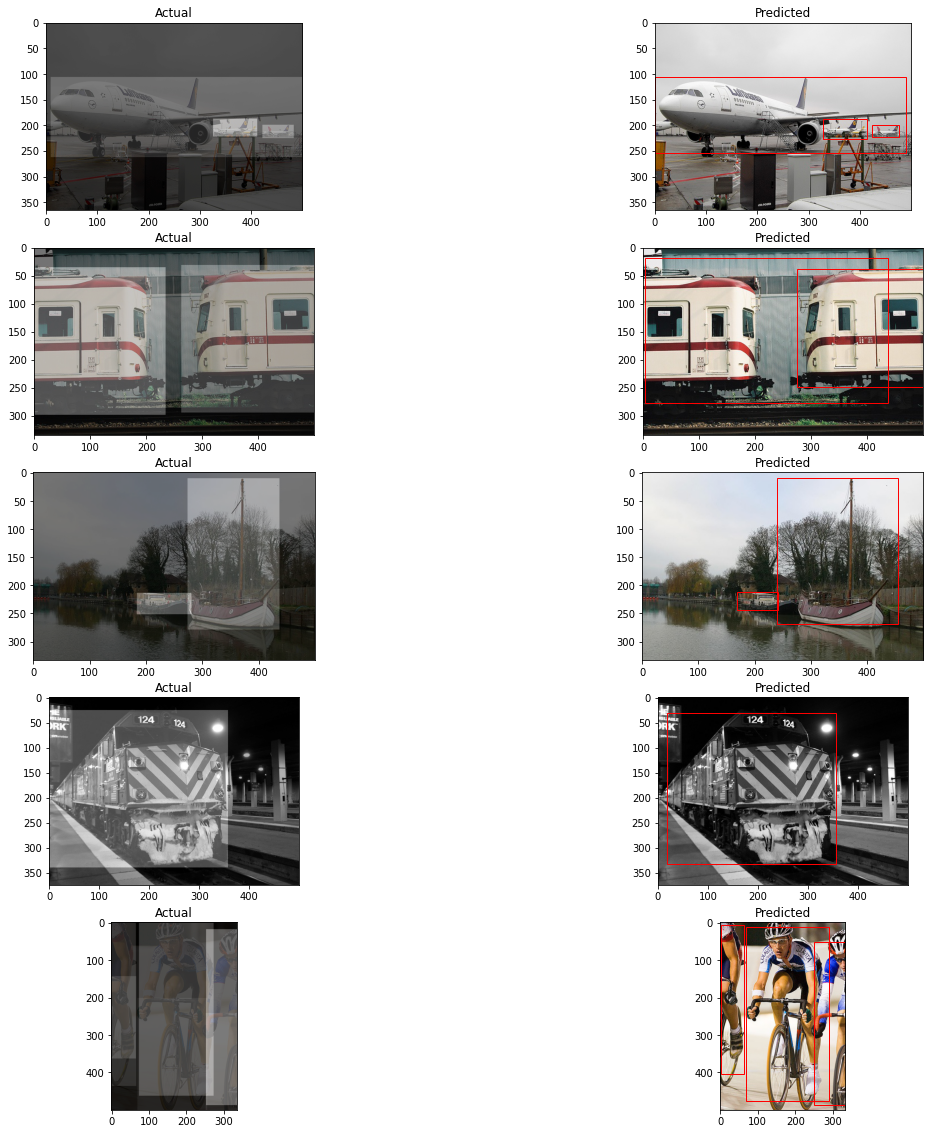

In [30]:


# plot predictions for test dataset
plot_actual_vs_predicted(test_set, model, cfg)